# Classificação

Para a tarefa de classificação queremos poder classificar um jogadoe com base em suas estatisticas de carreira, assim podemos ver como cada estatisica é mais discriminante de uma posição em relação à outra.

Utilizamos 3 tipos de classificadores. **Dicision Trees**, **Random Forests** e **KNN - K Nearest Neigbhors**.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load da Base no Dataframe Pandas
df_draft = pd.read_csv('../data/clean_nfl_draft.csv')
df_draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,carrer_years
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Florida St.,2.0
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0.0,Oregon,2.0
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida,2.0
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0.0,Alabama,2.0
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Iowa,2.0


Para a classificação desconsideramos os jogaodores de linha ofensiva - Center (C), Tackle (T), Guard (G) - e  jogadores de Special Teams (times especiais) - Kicker (K), Punter(P), uma vez que estes não possuem estatisticas registradas no dataset.

In [5]:
#Drop de labels específicas
drop_labels = ['C', 'T', 'G', 'K', 'P']
for label in drop_labels:
    df_draft.drop(df_draft.index[df_draft['Position Standard'] == label], inplace = True)
    
idx_sk = list(df_draft.columns).index('Sk')
idx_cmp = list(df_draft.columns).index('Cmp')

labels_class = df_draft.columns[idx_cmp:idx_sk+1]

#### Train Test Split

Divisão dos dados em treino e teste.

In [6]:
#Definimos as variáveis X e Y que serão usadas no modelo
X = df_draft[labels_class]
y = df_draft['Position Standard']

#Separamos quanto dos dados será usado para treino e quanto será usado para teste.
#Nesse caso, 33% dos dados estarão dedicados à teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

## Decision Trees

In [7]:
#Utilizamos o modelo de árvore de decisão
dtree = DecisionTreeClassifier()

#Treinamento do modelo
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction and Evaluation

In [13]:
#Rodamos o modelo que acabamos de treinar e realizamos a predição de fato
predictions = dtree.predict(X_test)

print("Classification Report e matriz de confusão - Decision Trees")
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Classification Report e matriz de confusão - Decision Trees


             precision    recall  f1-score   support

         DB       0.67      0.67      0.67       475
         DE       0.44      0.34      0.39       209
         DT       0.33      0.25      0.28       183
         FB       0.24      0.17      0.20        24
         LB       0.34      0.51      0.41       309
         QB       0.96      0.95      0.95        96
         RB       0.86      0.81      0.83       213
         TE       0.57      0.55      0.56       133
         WR       0.77      0.66      0.71       282

avg / total       0.60      0.58      0.58      1924



[[320   7  14   0 124   1   2   0   7]
 [ 28  72  47   1  61   0   0   0   0]
 [ 27  50  45   1  59   0   1   0   0]
 [  0   0   0   4   0   0  17   0   3]
 [ 87  33  31   0 157   0   0   1   0]
 [  0   0   0   0   4  91   0   0   1]
 [  2   0   0  10  18   2 172   2   7]
 [  4   0   0   1  13   0   4  73  38]
 [ 10   0   0   0  29   1   4  52 186]

## Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Semelhante ao que fizemos acima, treinamos um outro modelo. Agora, será usado o Random Forests
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#Analogamente, realizados a predição
rf_class_predict = rf_class.predict(X_test)

print("Classification Report e matriz de confusão - Random Forests")
print('\n')
print(classification_report(y_test,rf_class_predict))
print('\n')
print(confusion_matrix(y_test,rf_class_predict))

Classification Report e matriz de confusão - Random Forests


             precision    recall  f1-score   support

         DB       0.71      0.68      0.70       475
         DE       0.48      0.41      0.44       209
         DT       0.37      0.25      0.30       183
         FB       0.17      0.04      0.07        24
         LB       0.36      0.56      0.43       309
         QB       0.97      0.94      0.95        96
         RB       0.85      0.87      0.86       213
         TE       0.67      0.53      0.59       133
         WR       0.81      0.74      0.77       282

avg / total       0.63      0.61      0.62      1924



[[323   6  11   0 130   1   1   0   3]
 [ 22  86  40   1  59   1   0   0   0]
 [ 25  52  46   1  58   0   1   0   0]
 [  0   0   0   1   0   0  20   1   2]
 [ 73  35  28   0 172   0   0   1   0]
 [  0   0   0   0   4  90   2   0   0]
 [  2   0   0   1  18   1 186   1   4]
 [  4   0   0   2  12   0   4  70  41]
 [  5   0   0   0  30   0   6  32 209]

---

## KNN - K Nearest Neigbhors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Escolhemos, então, um terceiro modelo. Dessa vez será usado o KNN
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Para utilizar o KNN, normalizamos os dados de teste e treino utilizando o **Standar Scaler**.

In [18]:
scaled_features = scaler.transform(X) 

df_feat = pd.DataFrame(scaled_features, columns=labels_class)
df_feat.head()

,Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk
0,1.724437,1.768809,1.845881,1.823803,1.618230,0.112399,0.071345,0.682295,-0.339055,-0.310469,-0.279062,-0.456882,-0.325187,-0.320854
1,1.443272,1.377709,1.513708,1.823803,1.127289,0.085209,0.260608,0.300547,-0.330440,-0.282991,-0.177800,-0.456882,-0.325187,-0.320854
2,-0.127134,-0.130523,-0.126616,-0.117919,-0.135130,-0.221653,-0.215781,-0.208451,-0.339055,-0.310469,-0.279062,-0.335659,-0.325187,-0.129724
3,-0.127134,-0.130523,-0.126616,-0.117919,-0.135130,-0.210000,-0.218551,-0.208451,0.815283,1.009824,0.632299,-0.456882,-0.325187,-0.320854
4,-0.127134,-0.130523,-0.126616,-0.117919,-0.135130,-0.221653,-0.215781,-0.208451,-0.339055,-0.310469,-0.279062,-0.032602,-0.325187,0.367213


#### Train Test Split

In [19]:
#Separação dos dados em treino e teste. 33% da base estará dedicada à teste.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(scaled_features, y, test_size = 0.33)

In [20]:
#Treinamento do KNN
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
#Mais uma vez realizamos a predição do modelo
predicition_knn = knn.predict(X_test_knn)

#### Prediction and Evaluation

In [22]:
#Matriz de confusão e resultados para K = 1
print("K = 1")
print('\n')
print(confusion_matrix(y_test_knn, predicition_knn))
print('\n')
print(classification_report(y_test_knn,predicition_knn))

K = 1


[[324  14  15   0  75   1   0   0   1]
 [ 39  81  54   1  49   0   0   0   0]
 [ 32  43  59   0  54   0   0   0   0]
 [  3   1   0   1   0   0   7   0   2]
 [129  27  32   1 138   0   0   0   1]
 [  6   0   0   1   0  91   2   1   0]
 [ 15   0   0  12   3   0 183   6   5]
 [  5   0   0   1   4   0   6  61  57]
 [ 22   2   1   2   0   2   3  50 199]]


             precision    recall  f1-score   support

         DB       0.56      0.75      0.64       430
         DE       0.48      0.36      0.41       224
         DT       0.37      0.31      0.34       188
         FB       0.05      0.07      0.06        14
         LB       0.43      0.42      0.42       328
         QB       0.97      0.90      0.93       101
         RB       0.91      0.82      0.86       224
         TE       0.52      0.46      0.48       134
         WR       0.75      0.71      0.73       281

avg / total       0.59      0.59      0.59      1924



#### Escolhendo o melhor K

Após a primeira aplicação do KNN utilizando K = 1, realizamos novas aplicações do modelo com diferentes valores de K na intenção de achar o valor que nos retorna-se o menor erro para os dados.

In [31]:
error = []

#Com o objetivo de melhorar os resultados, rodamos o KNN diversas vezes com valores diferentes para o parâmetro K
for i in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,y_train_knn)
    pred_i = knn.predict(X_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

Text(0,0.5,'Taxa de Error')

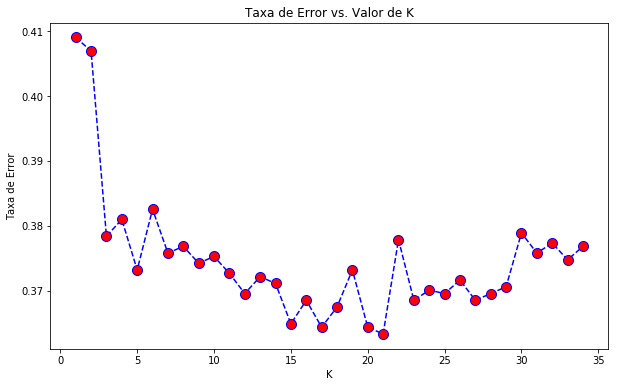

In [32]:
#Abaixo é mostrado um gráfico da taxa de erro encontrada nos resultados do modelo
#para cada valor de K escolhido anteriormente
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Error')

Com base no gráfico podemos ver que com **K = 23**, temos o menor erro para o nosso modelo e que a partir desse valor temos uma taxa de erro novamente crescente. Assim iremos re-aplicar o modelo aos dados utilizando nosso melhor valor de K

In [33]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train_knn, y_train_knn)
predicition_knn_23 = knn.predict(X_test_knn)

#Matriz de confusão e reusltados para o modelo com K = 23
print("K = 23")
print('\n')
print(confusion_matrix(y_test_knn, predicition_knn_23))
print('\n')
print(classification_report(y_test_knn,predicition_knn_23))

K = 23


[[319   4   8   0  98   0   0   0   1]
 [ 25 116  32   0  50   0   0   0   1]
 [ 30  58  51   0  49   0   0   0   0]
 [  0   0   1   0   3   0   6   3   1]
 [ 89  47  16   0 174   0   0   0   2]
 [  0   0   0   0  10  86   5   0   0]
 [  4   0   0   1  13   0 187   3  16]
 [  0   0   0   0   6   0   1  37  90]
 [  5   0   1   0  20   1   1   8 245]]


             precision    recall  f1-score   support

         DB       0.68      0.74      0.71       430
         DE       0.52      0.52      0.52       224
         DT       0.47      0.27      0.34       188
         FB       0.00      0.00      0.00        14
         LB       0.41      0.53      0.46       328
         QB       0.99      0.85      0.91       101
         RB       0.94      0.83      0.88       224
         TE       0.73      0.28      0.40       134
         WR       0.69      0.87      0.77       281

avg / total       0.64      0.63      0.62      1924



Logo, podemos ver que utilizando nosso melhor valor de K temos um aumento nos valores de precisão, revocação e do f1-score. E mesmo não tendo otimos valores parar essas métricas, podemos assumir que utilizando o KNN temos um melhor modelo para classificação dos jogadores utilizando suas estatítisicas de carreira.

---